# Introduction à l'apprentissage automatique: TP2 - Exercice 1

<br>

## Algorithmes de partitionnement et données synthétiques

Le but de ce premier exercice est d'explorer des algorithmes de partitionnement ( _clustering_ ) sur des jeux de données synthétiques 2D. On comparera les classifications hiérarchiques et l'algorithme $K$-means. 


Cet exercice est inspiré en partie de [cette page de la documentation scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)

Dans cet exercice (et seulement dans cet exercice), on utilisera les algorithmes de classification hiérarchique de la bibliothèque `scipy` plutôt que ceux de `scikit-learn` de manière à tracer facilement les dendrogrammes; ils sont décrits [ici](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)


<br>

__TRAVAIL A FAIRE (il s'agit de l'objectif des questions suivantes)__: mettez en évidence les propriétés / limites des différents algorithmes en jouant sur les paramètres. Pour chaque jeu de données synthétiques défini ci-dessous:
- pour les classifications hiérarchiques, faites le lien entre le dendrogramme et les valeurs de seuil permettant de trouver des clusters raisonnables dans chaque jeu de donnée
- quel(s) jeu(x) de données pose(nt) le problème du _chaînage_ pour la classification _single linkage_ ? Dans ce cas, que donne le critère de Ward?
- pour la méthode des $K$-moyennes, la méthode du coude permet-elle de fixer simplement la valeur de $K$?
- discutez la pertinence des résultats de chaque méthode selon le jeu de données

Exécutez les cellules de ce carnet Jupyter les unes après les autres.  Attention à bien exécuter les cellules dans l'ordre, sinon vous n'allez pas travailler avec les bonnes variables (en particulier, le dendrogramme dans la variable $Z$ doit avoir été calculé juste avant de le représenter graphiquement, sinon l'affichage sera incohérent).

En cas de problème d'exécution du code Python, vous pouvez redémarrer le noyau / kernel (onglet dans la barre du carnet Jupyter en haut).

## 1. On commence par charger les bibliothèques utiles

In [3]:
# import des bibliothèques Python utiles:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# pour les "widgets" Jupyter permettant de régler les valeurs de variables 
import ipywidgets as widgets  
from ipywidgets import interact

%matplotlib inline

## 2. Génération des données synthétiques

In [4]:
n_samples = 100

# blobs isotropes
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)

# "lunes"
moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# blobs anisotropes
random_state = 150
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs d'étalements variés tupla
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


## 3. Partitionnement des jeux de données avec différents algorithmes

### 3.1 Visualisation du jeu de données à partitionner

La première ligne de la cellule suivante permet de changer le jeu de données: commencez par _blobs_ et exécutez le carnet jusque la fin, puis ré-exécuter le carnet depuis ici avec _moons_ , _aniso_ , _varied_ .
<a id="debut"></a>

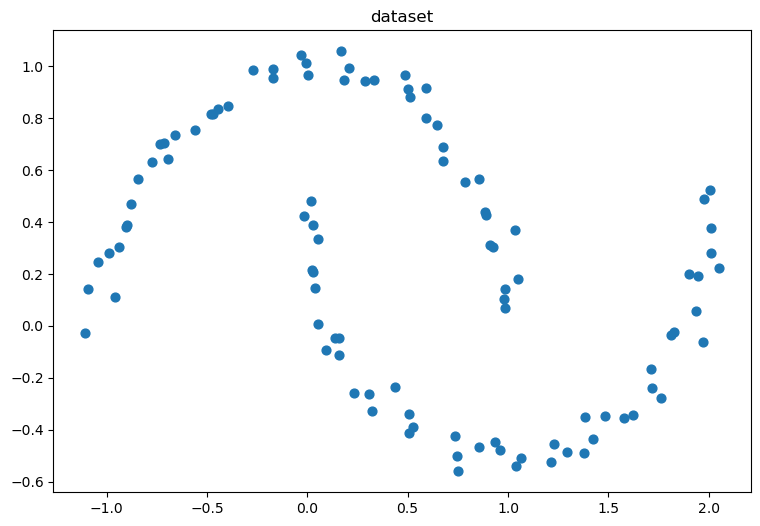

In [5]:
X,y = moons  # changer le dataset ici (commencer par blobs, puis moons, aniso, varied)

plt.figure(figsize=[9,6])
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.title('dataset')
plt.show()

### 3.2 Classification hiérarchique, critère single-linkage 

On commence par afficher le dendrogramme:

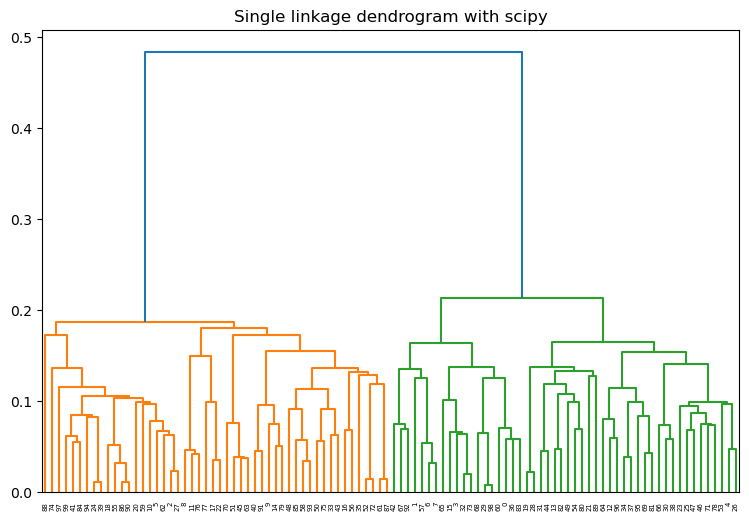

In [6]:
Z = linkage(X,method="single")
maxdist=max(Z[:,2])  # hauteur du dendrogramme 
plt.figure(figsize=[9,6]);
dendrogram(Z) #,truncate_mode="level",p=10);  # le paramètre p permet éventuellement de ne pas afficher le "bas" du dendrogramme, utile pour un grand jeu de données
plt.title('Single linkage dendrogram with scipy')
plt.show()

La cellule suivante permet de changer la valeur du seuil (variable _seuil_ ) dans le dendrogramme de manière interactive (cela fixe donc le nombre de clusters) et affiche le partitionnement correspondant:

In [ ]:
@interact(seuil=(0,maxdist,maxdist/100))   # "décorateur" Jupyter, permettant une interaction avec un argument de la fonction
def graphique_clustering_single(seuil):
    clusters=fcluster(Z, seuil, criterion='distance') 
    plt.figure(figsize=[9,6]);
    plt.scatter(X[:, 0], X[:, 1], s=40, c=clusters, cmap='jet');
    plt.title('Single linkage with scipy, seuil='+str(seuil)+', nombres de clusters: '+str(max(clusters)))
    plt.show()

interactive(children=(FloatSlider(value=0.24198701554293398, description='seuil', max=0.48397403108586795, ste…

0.48397403108586795
0.5


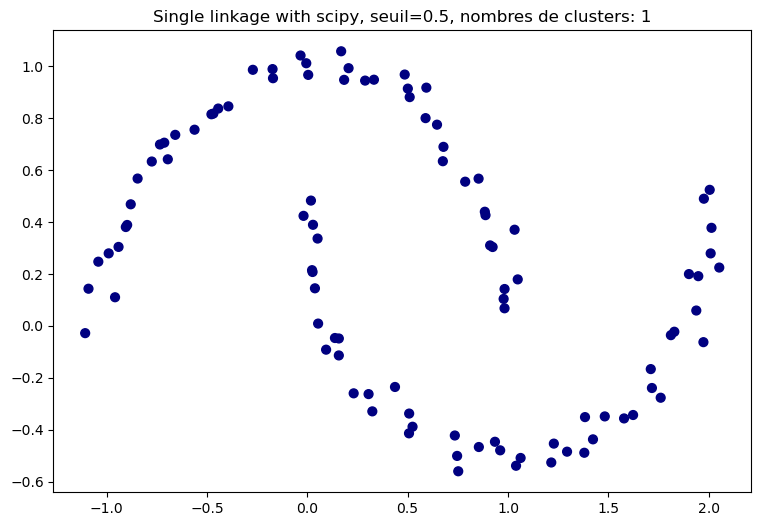

In [8]:
# dans certains cas, @interact ne fonctionne pas 
# (si la cellule précédente fonctionne, n'exécutez pas le code de la présente cellule)
# si vous êtes dans cette situation, faites varier la valeur de seuil entre 0 et maxdist et appelez la fonction d'affichage,
# comme ci-dessous:
# (vous ferez de même dans les cellules ci-dessous faisant appel à @interact)
print(maxdist)
seuil= 0.5
print(seuil)
graphique_clustering_single(seuil)

__Question 1__. Jouez avec le seuil et faites le lien entre le dendogramme et le nombre de groupes. Le partitionnement vous semble-t-il correspondre à ce qu'on aimerait obtenir? (à discuter selon le dataset)

Réciproquement, la cellule suivante permet de changer la valeur du nombre de clusters ($nc$) à trouver et "coupe" le dendrogramme à la hauteur correspondate:

In [9]:
@interact(nc=(1,10,1))
def graphique_clustering_single(nc):
    clusters=fcluster(Z, nc, criterion='maxclust') 
    plt.figure(figsize=[9,6]);
    plt.scatter(X[:, 0], X[:, 1], s=40, c=clusters, cmap='jet')
    plt.title('Single linkage with scipy, n_cluster='+str(nc))
    plt.show()

interactive(children=(IntSlider(value=5, description='nc', max=10, min=1), Output()), _dom_classes=('widget-in…

<font color=red>

Quanto mais clusters, mais grupo no dendograma. 
    
</font>

### 3.3 Classification hiérarchique, critère de Ward

On commence par afficher le dendrogramme:

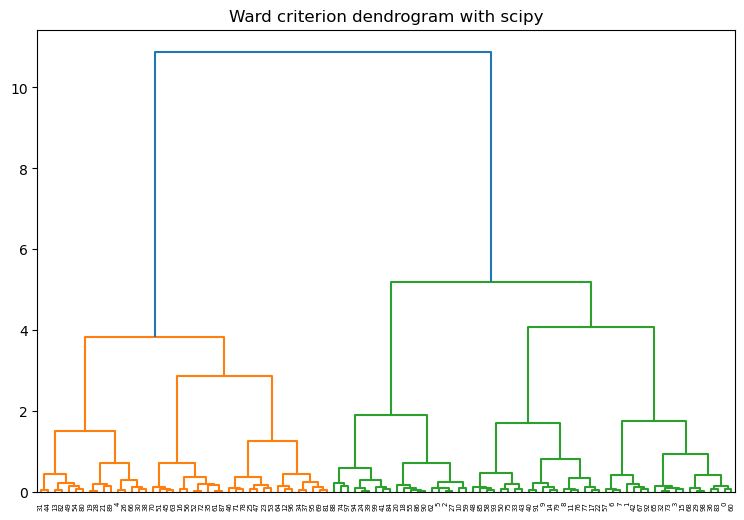

In [10]:
Z = linkage(X,method="ward")
maxdist=max(Z[:,2])
plt.figure(figsize=[9,6]);
dendrogram(Z)#,truncate_mode="level",p=5)
plt.title('Ward criterion dendrogram with scipy')
plt.show()

__Question 2__. Comparez l'aspect du dendrogramme avec celui obtenu avec le critère single-linkage, et les différences de comportement selon le dataset.

<font color=red>

Com o Single Linkage, a árvore sempre se divide em dois.

</font>

Changez la valeur du seuil (variable _seuil_ ) dans le dendrogramme (qui fixe le nombre de clusters):

In [11]:
@interact(seuil=(0,maxdist,maxdist/100))
def graphique_clustering_Ward(seuil):
    clusters=fcluster(Z, seuil, criterion='distance') 
    plt.figure(figsize=[9,6]);
    plt.scatter(X[:, 0], X[:, 1], s=40, c=clusters, cmap='jet')
    plt.title('Ward linkage with scipy, seuil='+str(seuil)+', nombres de clusters: '+str(max(clusters)))
    plt.show()

interactive(children=(FloatSlider(value=5.443639462801946, description='seuil', max=10.887278925603892, step=0…

On peut aussi changer la valeur du nombre de clusters (nc) à trouver:

In [12]:
@interact(nc=(1,10))
def graphique_clustering_Ward(nc):
    clusters=fcluster(Z, nc, criterion='maxclust') 
    plt.figure(figsize=[9,6]);
    plt.scatter(X[:, 0], X[:, 1], s=40,c=clusters,cmap='jet')
    plt.title('Ward linkage with scipy, n_cluster='+str(nc))
    plt.show()

interactive(children=(IntSlider(value=5, description='nc', max=10, min=1), Output()), _dom_classes=('widget-in…

### 3.4 $K$-means


L'algorithmes des $K$-moyennes ( _$K$-means_ ) est décrit sur [cette page](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) et sur [celle-ci](http://scikit-learn.org/stable/modules/clustering.html#k-means) (rappel du cours). 

Changez la valeur du nombre $K$ de clusters:

In [13]:
@interact(K=(1,10,1))
def graphique_clustering_KMeans(K):
    clustering=cluster.KMeans(n_clusters=K, n_init=10)  
    clustering.fit(X)
    #print("Inertie: %.2f" % clustering.inertia_)
    plt.figure(figsize=[9,6])
    plt.scatter(X[:, 0], X[:, 1], s=40,c=clustering.labels_,cmap='jet')
    plt.title(f'Kmeans, n_cluster={K}, inertie={clustering.inertia_:.2f}')
    plt.show()

interactive(children=(IntSlider(value=5, description='K', max=10, min=1), Output()), _dom_classes=('widget-int…

__Question 3__. Pour quels datasets $K$-means vous semble-t-il adapté? Constatez que d'une exécution à l'autre, l'algorithme peut donner un résultat différent. Pour quelle raison?

In [14]:

@interact(seuil=(0,4,0.04))   # "décorateur" Jupyter, permettant une interaction avec un argument de la fonction
def graphique_clustering_single(seuil):
    clusters=fcluster(Z, seuil, criterion='distance') 
    plt.figure(figsize=[9,6]);
    plt.scatter(X[:, 0], X[:, 1], s=40, c=clusters, cmap='jet');
    plt.title('Single linkage with scipy, seuil='+str(seuil)+', nombres de clusters: '+str(max(clusters)))
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='seuil', max=4.0, step=0.04), Output()), _dom_classes…

<font color=red>
    
Para dados categorizados. 

</font>

On va tracer le graphique de l'inertie optimale à $K$ fixé, en fonction du nombre $K$ de clusters cherchés. La méthode du "coude" ( _elbow_ ) fixe $K$ comme le premier point du graphique où l'inertie ne baisse plus vraiment et s'infléchit (présence d'un "coude"). 

c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

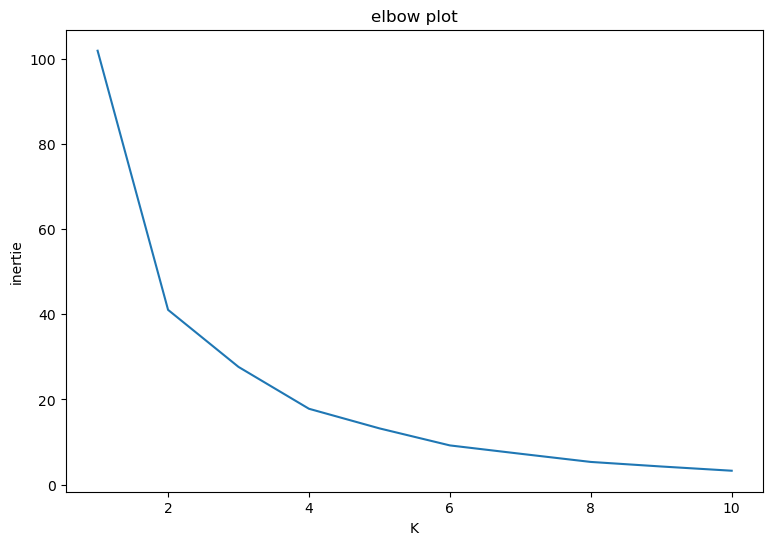

In [15]:
inertie=np.zeros((10))
for K in range(1,11):
    clustering=cluster.KMeans(n_clusters=K, n_init=10)
    clustering.fit(X)
    inertie[K-1]=clustering.inertia_
plt.figure(figsize=[9,6]);
plt.plot(np.arange(1,11),inertie)
plt.xlabel("K");
plt.ylabel("inertie")
plt.title("elbow plot")
plt.show()

__Question 4__. Pour quel(s) dataset(s) la méthode du coude vous semble-t-elle adaptée?

<font color=red>

blobs : menos pior
Ansio : bem direto
moons e varied : pior

</font>

[Retour au choix du jeu de données](#debut)